<a href="https://colab.research.google.com/github/NicoPerotto/challenge1-data-science-latam/blob/main/alurastorelatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [28]:
from enum import nonmember
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tiendas = [tienda1, tienda2, tienda3, tienda4]
nombres_tiendas = ['tienda 1', 'tienda 2', 'tienda 3', 'tienda 4']
pd.concat([df.head(3) for df in tiendas])

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
0,Secadora de ropa,Electrodomésticos,1285100.0,66600.0,17/12/2021,Camila Rivera,Santa Marta,4,Tarjeta de crédito,4,11.24079,-74.19904
1,Mesa de noche,Muebles,290100.0,13600.0,10/02/2021,Maria Alfonso,Cali,3,Tarjeta de crédito,1,3.43722,-76.52250
2,Guitarra acústica,Instrumentos musicales,303500.0,17400.0,22/01/2023,Lucas Olivera,Bogotá,5,Tarjeta de crédito,3,4.60971,-74.08175
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#Importando librerías

In [29]:
import matplotlib.pyplot as plt

#1. Análisis de facturación



In [30]:
ingresos_tiendas = [df['Precio'].sum() for df in tiendas]

ingreso_tiendas = pd.Series(ingresos_tiendas, index= nombres_tiendas)


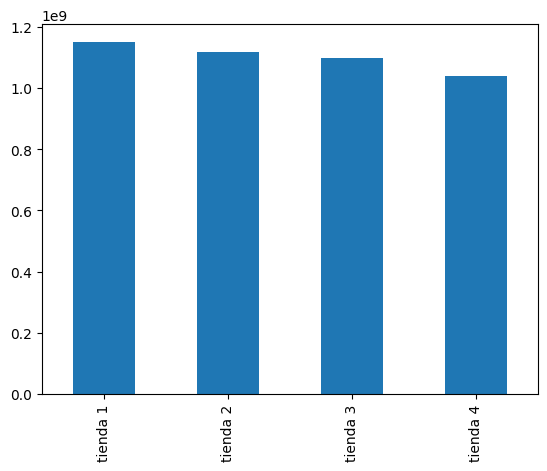

In [31]:
ingreso_tiendas.plot(kind='bar')
plt.show()

# 2. Ventas por categoría

In [41]:
ventas_categoria = [df.groupby('Categoría del Producto')['Producto'].count() for df in tiendas]
vc_tiendas = pd.concat(ventas_categoria, axis=1)
vc_tiendas

,Producto,Producto,Producto,Producto
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


# 3. Calificación promedio de la tienda


In [34]:
calificacion_tienda1 = tienda1['Calificación'].mean()
calificacion_tienda2 = tienda2['Calificación'].mean()
calificacion_tienda3 = tienda3['Calificación'].mean()
calificacion_tienda4 = tienda4['Calificación'].mean()

calificacion_tiendas = pd.Series({'tienda 1': calificacion_tienda1,
                   'tienda 2': calificacion_tienda2,
                   'tienda 3': calificacion_tienda3,
                   'tienda 4': calificacion_tienda4})

3.976685036032217 4.037303942348453 4.048325561678677 3.9957591178965224


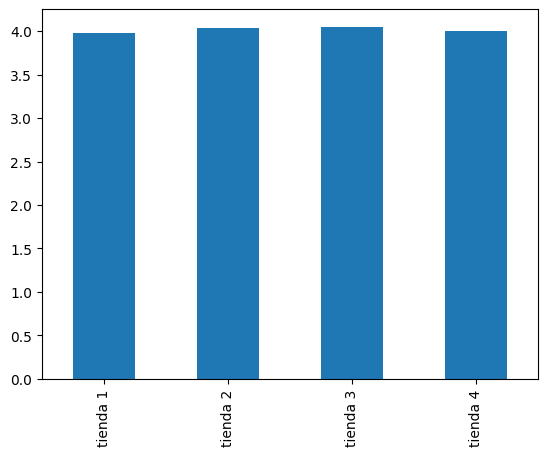

In [35]:
print (calificacion_tienda1, calificacion_tienda2, calificacion_tienda3, calificacion_tienda4)
calificacion_tiendas.plot(kind='bar')
plt.show()


# 4. Productos más y menos vendidos

##Productos vendidos en cada tienda

In [36]:
db_productos_tienda1 = tienda1['Producto'].value_counts()
db_productos_tienda2 = tienda2['Producto'].value_counts()
db_productos_tienda3 = tienda3['Producto'].value_counts()
db_productos_tienda4 = tienda4['Producto'].value_counts()


###Productos mas vendidos por tienda

In [37]:
mas_vendido_tienda1 = db_productos_tienda1[db_productos_tienda1 == db_productos_tienda1.max()]
mas_vendido_tienda2 = db_productos_tienda2[db_productos_tienda2 == db_productos_tienda2.max()]
mas_vendido_tienda3 = db_productos_tienda3[db_productos_tienda3 == db_productos_tienda3.max()]
mas_vendido_tienda4 = db_productos_tienda4[db_productos_tienda4 == db_productos_tienda4.max()]
print(mas_vendido_tienda1, mas_vendido_tienda2, mas_vendido_tienda3, mas_vendido_tienda4)


Producto
Microondas       60
TV LED UHD 4K    60
Armario          60
Name: count, dtype: int64 Producto
Iniciando en programación    65
Name: count, dtype: int64 Producto
Kit de bancas    57
Name: count, dtype: int64 Producto
Cama box    62
Name: count, dtype: int64


###Productos menos vendidos por tienda

In [38]:
menos_vendido_tienda1 = db_productos_tienda1[db_productos_tienda1 == db_productos_tienda1.min()]
menos_vendido_tienda2 = db_productos_tienda2[db_productos_tienda2 == db_productos_tienda2.min()]
menos_vendido_tienda3 = db_productos_tienda3[db_productos_tienda3 == db_productos_tienda3.min()]
menos_vendido_tienda4 = db_productos_tienda4[db_productos_tienda4 == db_productos_tienda4.min()]
print(menos_vendido_tienda1, menos_vendido_tienda2, menos_vendido_tienda3, menos_vendido_tienda4)

Producto
Auriculares con micrófono    33
Celular ABXY                 33
Name: count, dtype: int64 Producto
Juego de mesa    32
Name: count, dtype: int64 Producto
Bloques de construcción    35
Name: count, dtype: int64 Producto
Guitarra eléctrica    33
Name: count, dtype: int64


# 5. Envío promedio por tienda

26018.60958033065 25216.235693090293 24805.680373039424 23459.457167090754


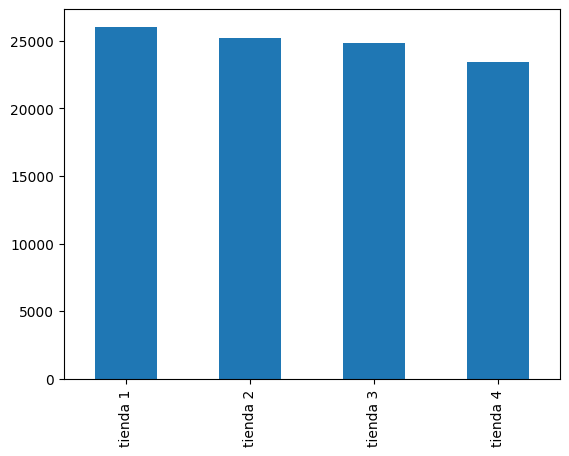

In [39]:
envio_tienda1 = tienda1['Costo de envío'].mean()
envio_tienda2 = tienda2['Costo de envío'].mean()
envio_tienda3 = tienda3['Costo de envío'].mean()
envio_tienda4 = tienda4['Costo de envío'].mean()

envio_tiendas = pd.Series({'tienda 1': envio_tienda1,
                   'tienda 2': envio_tienda2,
                   'tienda 3': envio_tienda3,
                   'tienda 4': envio_tienda4})
print(envio_tienda1, envio_tienda2, envio_tienda3, envio_tienda4)
envio_tiendas.plot(kind='bar')
plt.show()